# Homework 1
## PSTAT 131

# Machine Learning Main Ideas
Please answer the following questions. Be sure that your solutions are clearly marked and that your document is neatly formatted.

You don’t have to rephrase everything in your own words, but if you quote directly, you should cite whatever materials you use (this can be as simple as “from the lecture/page # of book”).

### Question 1:
Define supervised and unsupervised learning. What are the difference(s) between them?

> **Supervised learning** involves building a statistical model for predicting, or estimating, an output based on 1 ore more inputs (i.e. Linear, logistic, GAM, boosting, support vector machines). Meanwhile, **unsupervised learning** involves inputs but no supervising output (associated response Y) to accompany it.

### Question 2: 
Explain the difference between a regression model and a classification model, specifically in the context of machine learning.

> A regression model aims to predict/estimate some Y that is quantitative (i.e. price, blood pressure, speed) while classification models aim to predict some Y that is qualitative (i.e. survived/died, spam/not spam, fraud/not fraud).

### Question 3:
Name two commonly used metrics for regression ML problems. Name two commonly used metrics for classification ML problems.
>**Regression:** Mean squared error, R-squared, Root mean squared error

>**Classification:** Accuracy, Precision, Area under ROC Curve

### Question 4:
As discussed, statistical models can be used for different purposes. These purposes can generally be classified into the following three categories. Provide a brief description of each.

- Descriptive models: 
> A model to best visually emphasize a trend in data (i.e. using a line, histogram, scatterplot).

- Inferential models:
> A model to determine which features are significant; the aim is to test theories and stat relationship between outcome & predictor(s).

- Predictive models:
> A model that aims to predict Y with minimum *reducible* error and isn't focused on hypothesis tests.

### Question 5:
Predictive models are frequently used in machine learning, and they can usually be described as either mechanistic or empirically-driven. Answer the following questions.

- Define mechanistic. Define empirically-driven. How do these model types differ? How are they similar?
> **Mechanistic** models specify assumptions and attempt to incorporate known factors about the systems surrounding the data in to the model, while describing the availible data. Meanwhile, **Empirical** models are focused on describing the data with the specification of very few assumptions about the data being analyzed. (Bonate, 2011). Empirically-driven models tend to require a much large # of observations but are much more flexible by default.

- In general, is a mechanistic or empirically-driven model easier to understand? Explain your choice.
> Mechanistic models are easier to understand as they are parametric and are based off a hypothesized relationship between the variables in the data set that are often already defined. Meanwhile, statistical models usually forego any attempt to explain why the parameters interact the way they do.

- Describe how the bias-variance tradeoff is related to the use of mechanistic or empirically-driven models.
> The Bias-Variance tradeoff is related to the use of mechanistic/empirically-drive models as it describes a similar back-and-forth exchange where in attempting to minimize a models bias (with a more flexible empirical model), one will often increase it's variance (and vice versa with a less flexible mechanistic model). 

### Question 6:
A political candidate’s campaign has collected some detailed voter history data from their constituents. The campaign is interested in two questions:

Classify each question as either predictive or inferential. Explain your reasoning for each.

- Given a voter’s profile/data, how likely is it that they will vote in favor of the candidate?
>The following is predictive as it seeks to predict some future Y (in this case likelihood of voting for a candidate) based on existing data.

- How would a voter’s likelihood of support for the candidate change if they had personal contact with the candidate?
>The following would be classified as inferential as it seeks to understand the causal impact of the feature described above.

## Exploratory Data Analysis
This section will ask you to complete several exercises. For this homework assignment, we’ll be working with the mpg data set. 

Exploratory data analysis (or EDA) is not based on a specific set of rules or formulas. It is more of a state of curiosity about data. It’s an iterative process of:

- generating questions about data
- visualize and transform your data as necessary to get answers
- use what you learned to generate more questions

A couple questions are always useful when you start out. These are “what variation occurs within the variables,” and “what covariation occurs between the variables.”

#### I will be using Pandas, Matplotlib/Seaborn for these exercises

In [1]:
#Loading necessary libraries
import pandas as pd #Data manipulation & analysis
import numpy as np 
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt 

In [140]:
mpg = pd.read_csv('mpg.csv')
mpg.head()
mpg = mpg.drop(mpg.columns[0], axis = 1)

In [152]:
mpg.head(7)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact


### Exercise 1:
We are interested in highway miles per gallon, or the hwy variable. Create a histogram of this variable. Describe what you see/learn.

> After creating the histogram of the **hwy** variable, we see most cars 25-30 mpg range with another significant portion around the 15-20 mpg range.

array([[<Axes: title={'center': 'hwy'}>]], dtype=object)

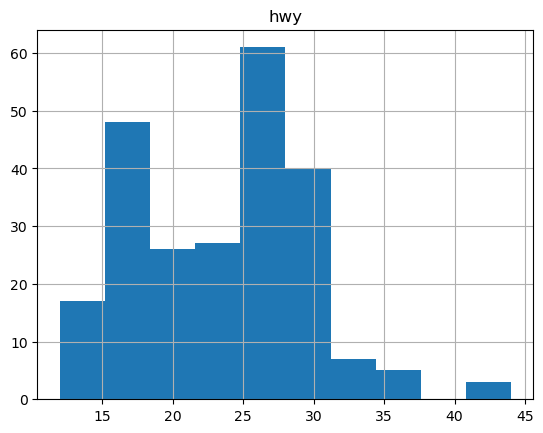

In [141]:
mpg.hist('hwy')

### Exercise 2:
Create a scatterplot. Put hwy on the x-axis and cty on the y-axis. Describe what you notice. Is there a relationship between hwy and cty? What does this mean?

> There is a clear trend and strong, positive correlation between fuel efficiency between the highway and city. This means that as a car's highway  fuel efficiency goes up, so does it's city efficiency as well.

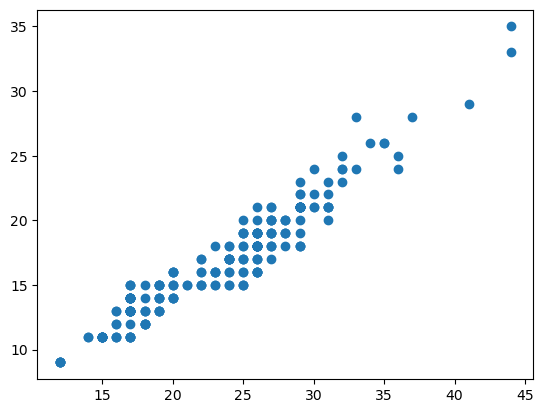

In [142]:
plt.scatter(mpg['hwy'], mpg['cty'])

### Exercise 3:
Make a bar plot of manufacturer. Flip it so that the manufacturers are on the y-axis. Order the bars by height. Which manufacturer produced the most cars? Which produced the least?
> Dodge had the most cars  while Lincoln had the least

Text(0.5, 0, 'Count of Vehicles')

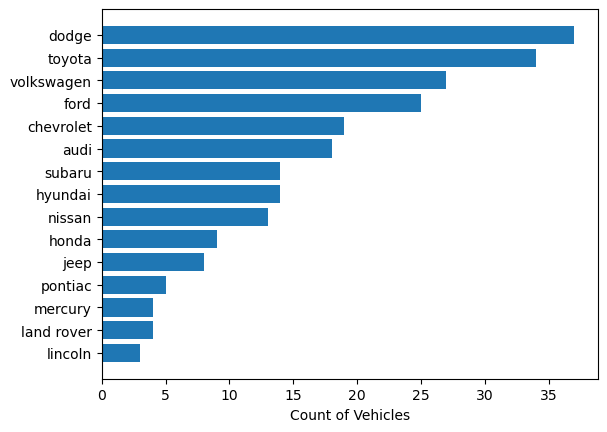

In [143]:
#Creates a series type that holds count in series.values and index in series.index
manufacturer_counts = mpg['manufacturer'].value_counts()

#We need to sort the data going into barh() as it doesn't have its own sort feature
manufacturer_counts = manufacturer_counts.sort_values(ascending= True)

#Using barh() instead of bar() to flip the axes
plt.barh(manufacturer_counts.index, manufacturer_counts.values)
plt.xlabel("Count of Vehicles") #self explanatory

### Exercise 4:
Make a box plot of hwy, grouped by cyl. Use geom_jitter() and the alpha argument to add points to the plot.

Describe what you see. Is there a relationship between hwy and cyl? What do you notice?
> There is a negative correlation between fuel efficiency on the highway and how many cylinders a car has. Also evident is the rarity of 5 cylinder cars.


<Axes: xlabel='cyl', ylabel='hwy'>

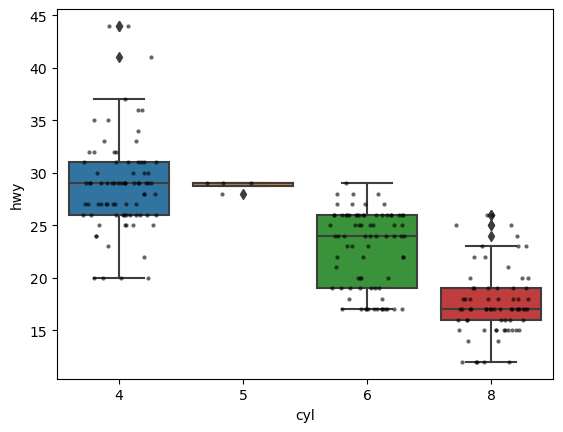

In [159]:
#Using seaborn here since it fills in color better and is easier to apply jitter equivalent
sns.boxplot(y ='hwy', x='cyl', data = mpg) 

#Stripplot to create individual observations behind scatterplot, jitter arg. controls spread, alpha controls transparency 
sns.stripplot(x='cyl', y='hwy', data= mpg, color='black', jitter=0.3, size=3, alpha=0.6) 

### Exercise 5:
Use the corrplot package to make a lower triangle correlation matrix of the mpg dataset. 

Which variables are positively or negatively correlated with which others? Do these relationships make sense to you? Are there any that surprise you?
> Based on the lower triangle correlation matrix we see that highway and city fuel efficiency are negatively correlated with cylinder count and displacement. Meanwhile cylinder and displacement have a strong positive correlation. This makes sense as more displacement is calculated by multipying the volume in one cylinder by the number of cylinders in the engine, and thus having a large number of cylinders (and displacement) means more fuel is being burned. City and highway fuel efficiency also had a strong positive correlation which was shown in our scatterplot earlier.

In [157]:
#Filtering out variables to avoid warning from Python
columns = ['displ', 'hwy', 'cty', 'cyl', 'year']
mpg_heat = mpg[columns]

,displ,hwy,cty,cyl,year
0,1.8,29,18,4,1999
1,1.8,29,21,4,1999
2,2.0,31,20,4,2008
3,2.0,30,21,4,2008
4,2.8,26,16,6,1999
...,...,...,...,...,...
229,2.0,28,19,4,2008
230,2.0,29,21,4,2008
231,2.8,26,16,6,1999
232,2.8,26,18,6,1999


<Axes: >

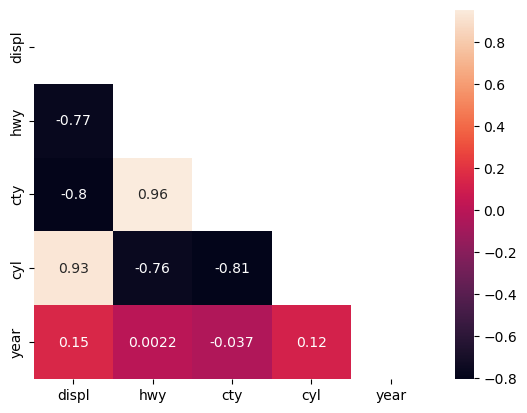

In [158]:
#Mask allows us to filter out the top half of the heat map to create the triangle shape
mask = np.triu(np.ones_like(mpg_heat.corr())) 
#Using seaborn again, annot arg. adds number to each correlation score, and mask applies the mask above
sns.heatmap(mpg_heat.corr(), annot=True, mask = mask)

## Acknowledgements

- Dataset was sourced from a GitHub repository __[here](https://github.com/sidsriv/Introduction-to-Data-Science-in-python/blob/master/mpg.csv)__.
- The book *An Introduction to Statistical Learning with Application in Python* was referenced which can be found __[here](https://www.statlearning.com/)__
- Documentation for MatPlotlib.pyplot was referenced __[here](https://matplotlib.org/stable/gallery/index.html)__.
- Documentation for Pandas functions were referenced __[here](https://pandas.pydata.org/pandas-docs/stable/index.html)__
- Documentation for Seaborn functions were referenced __[here](https://seaborn.pydata.org/tutorial/function_overview.html)__
- More general documentation inquiries were answered on GeeksforGeeks like this article __[here](https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/)__, and on StackOverflow like this article __[here](https://stackoverflow.com/questions/54424256/sort-bar-chart-by-list-values-in-matplotlib)__.